In [1]:
import sys
sys.path.append("./")  # 确保根目录在 sys.path 中
import src.sputter_angle_dist as sp_angle
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.transform import Rotation as Rotate

In [2]:
def etching_yield(E, Eth):
    return E**0.5 - Eth**0.5

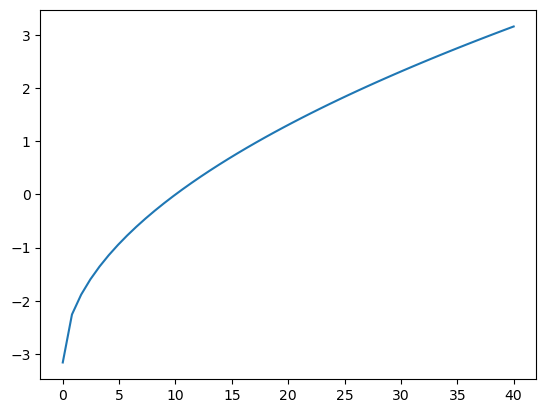

In [5]:
E_array = np.linspace(0, 40, 50)
e_yield = np.zeros_like(E_array)
for i in range(50):
    e_yield[i] = etching_yield(E_array[i], 10)

plt.plot(E_array, e_yield)

In [55]:
def E_s(Ei, theta):
    Ec = 0
    Ets = 50
    thetaC = 60
    return Ei*((Ei-Ec)/(Ets-Ec))*((theta-thetaC)/(90 - thetaC))

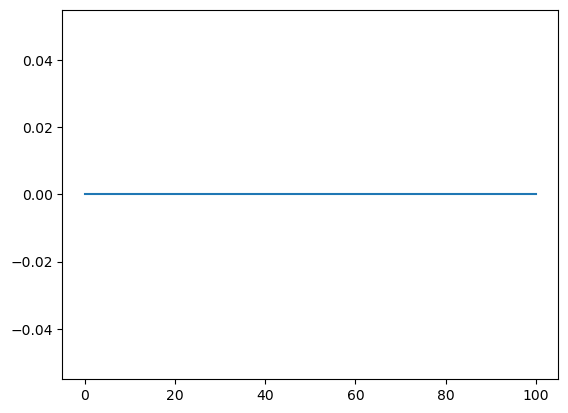

In [50]:
E_array = np.linspace(0, 100, 50)
e_yield = np.zeros_like(E_array)
for i in range(50):
    e_yield[i] = E_s(E_array[i], 60)

plt.plot(E_array, e_yield)

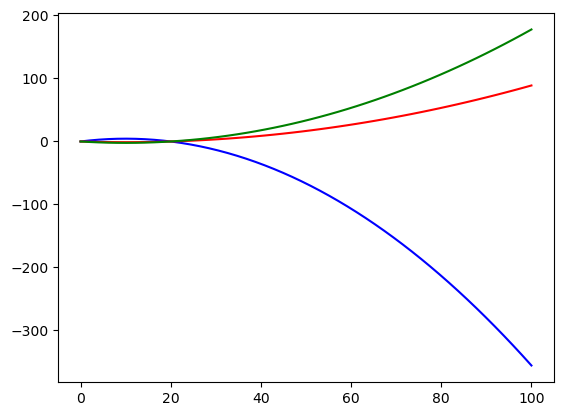

In [51]:
E_array = np.linspace(0, 100, 50)
e_yield = np.zeros_like(E_array)
e_yield2 = np.zeros_like(E_array)
e_yield3 = np.zeros_like(E_array)
for i in range(50):
    e_yield[i] = E_s(E_array[i], 20)
    e_yield2[i] = E_s(E_array[i], 70)
    e_yield3[i] = E_s(E_array[i], 80)

plt.plot(E_array, e_yield,color='blue')
plt.plot(E_array, e_yield2,color='red')
plt.plot(E_array, e_yield3,color='green')

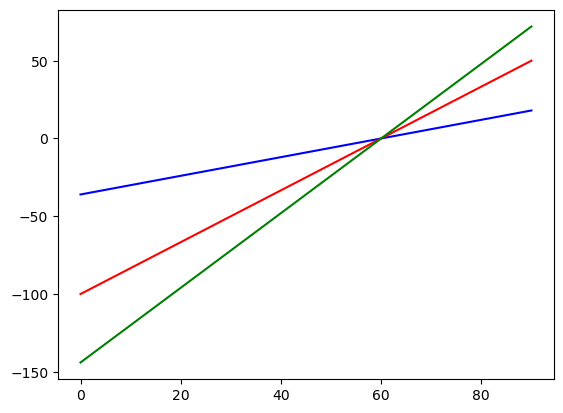

In [56]:
E_array = np.linspace(0, 90, 50)
e_yield = np.zeros_like(E_array)
e_yield2 = np.zeros_like(E_array)
e_yield3 = np.zeros_like(E_array)
for i in range(50):
    e_yield[i] = E_s(30, E_array[i])
    e_yield2[i] = E_s(50, E_array[i])
    e_yield3[i] = E_s(60, E_array[i])

plt.plot(E_array, e_yield,color='blue')
plt.plot(E_array, e_yield2,color='red')
plt.plot(E_array, e_yield3,color='green')

In [17]:
e_yield

array([-0.00000000e+00, -8.32986256e-02, -3.33194502e-01, -7.49687630e-01,
       -1.33277801e+00, -2.08246564e+00, -2.99875052e+00, -4.08163265e+00,
       -5.33111204e+00, -6.74718867e+00, -8.32986256e+00, -1.00791337e+01,
       -1.19950021e+01, -1.40774677e+01, -1.63265306e+01, -1.87421908e+01,
       -2.13244481e+01, -2.40733028e+01, -2.69887547e+01, -3.00708038e+01,
       -3.33194502e+01, -3.67346939e+01, -4.03165348e+01, -4.40649729e+01,
       -4.79800083e+01, -5.20616410e+01, -5.63098709e+01, -6.07246980e+01,
       -6.53061224e+01, -7.00541441e+01, -7.49687630e+01, -8.00499792e+01,
       -8.52977926e+01, -9.07122032e+01, -9.62932112e+01, -1.02040816e+02,
       -1.07955019e+02, -1.14035818e+02, -1.20283215e+02, -1.26697209e+02,
       -1.33277801e+02, -1.40024990e+02, -1.46938776e+02, -1.54019159e+02,
       -1.61266139e+02, -1.68679717e+02, -1.76259892e+02, -1.84006664e+02,
       -1.91920033e+02, -2.00000000e+02])

In [ ]:
from scipy import interpolate
yield_hist = np.array([[1.0, 1.01, 1.05,  1.2,  1.4,  1.5, 1.07, 0.65, 0.28, 0.08,  0, \
                        0.08, 0.28,0.65,  1.07, 1.5, 1.4, 1.2, 1.05, 1.01, 1.0 ], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                          100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi/2, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1, :11], yield_hist[0, :11], 'o', xnew, ynew, '-')
plt.show()